<a href="https://colab.research.google.com/github/ErykCud/MLinFin2024/blob/main/MlwFin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv',encoding='latin')




In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts()
df['Class'].value_counts()/df['Class'].count()


0    0.998273
1    0.001727
Name: Class, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Class'])
y = df['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

            Time        V1        V2        V3        V4        V5        V6  \
134955   81047.0  1.146174 -0.083967  0.602963  0.725410 -0.396283  0.186275   
84470    60323.0 -0.918050  0.578744  1.168159 -0.862173  0.969264  0.483973   
176085  122620.0 -2.013096 -3.261460 -1.443935  0.149307  2.734412 -1.572646   
79348    57979.0 -0.767334  0.383415  0.210914  0.035407  0.059217  1.220341   
63554    50771.0 -0.817828  1.621705  0.911472  1.305673 -0.402086  1.031816   
...          ...       ...       ...       ...       ...       ...       ...   
119879   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
259178  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
131932   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
146867   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
121958   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   

              V7        V8        V9  .

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Create an instance of the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# 2. Train the classifier using the training data
knn_classifier.fit(X_train, y_train)

# 3. Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# 4. Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9984678732165087


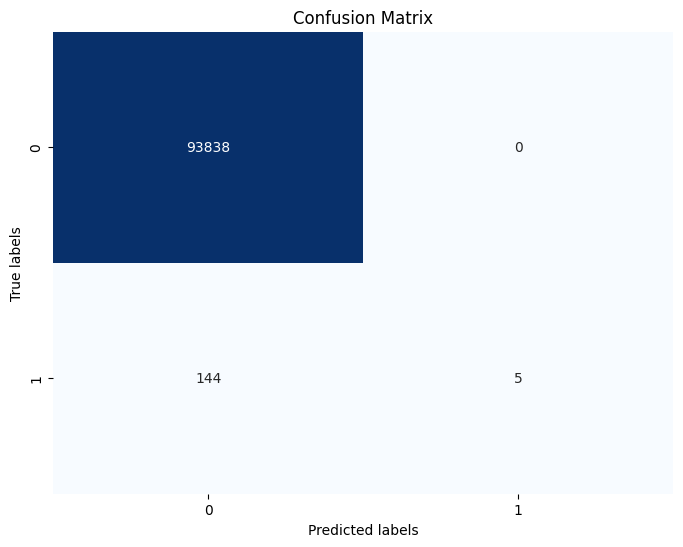

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
class_counts = df['Class'].value_counts()
class_weights = {0: 1 / class_counts[0], 1: 1 / class_counts[1]}

In [ ]:
# Create an instance of the KNeighborsClassifier with class weights
knn_classifier_weighted = KNeighborsClassifier(weights='distance')

# Train the classifier using the training data
knn_classifier_weighted.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier_weighted.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9985955504484663


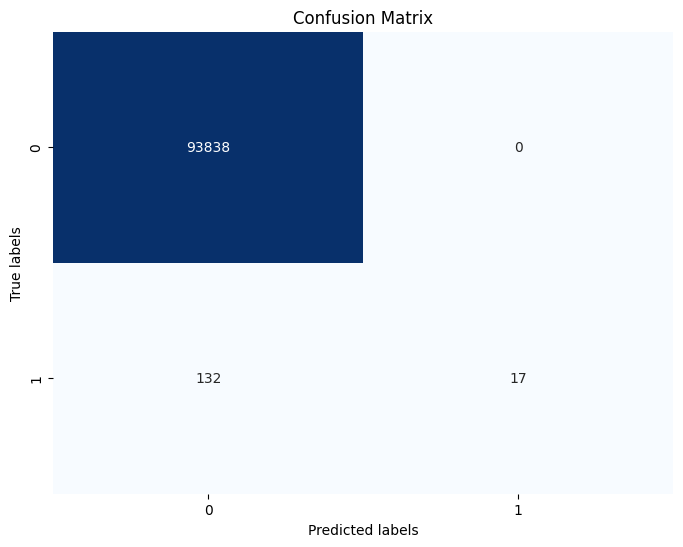

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np

def custom_weights(y):
    # Calculate class counts from the target array y
    class_counts = np.bincount(y)

    # In case there are missing classes, fill them with 1
    class_weights = np.where(class_counts == 0, 1, 1 / class_counts)

    return class_weights




In [ ]:
np

In [ ]:
# Create an instance of the KNeighborsClassifier with class weights
knn_classifier_weighted_custom = KNeighborsClassifier(weights=custom_weights)


# Train the classifier using the training data
knn_classifier_weighted_custom.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier_weighted_custom.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: object too deep for desired array

In [ ]:
recall = recall_score(y_test, y_pred)

NameError: name 'recall_score' is not defined

In [ ]:
pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE


SyntaxError: invalid syntax (<ipython-input-41-4a0c33ba2d3b>, line 1)

In [10]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


In [11]:
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)


In [14]:
# Create an instance of the KNeighborsClassifier with class weights
knn_classifier_weighted = KNeighborsClassifier()

# Train the classifier using the training data
knn_classifier_weighted.fit(X_train_os, y_train_os)

# Make predictions on the testing data
y_pred = knn_classifier_weighted.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9466096375030589


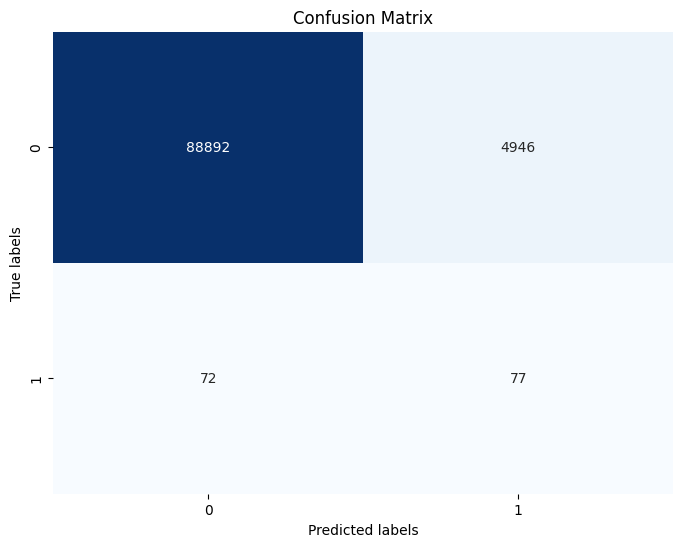

In [15]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()